In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


(4.0, 8.0)

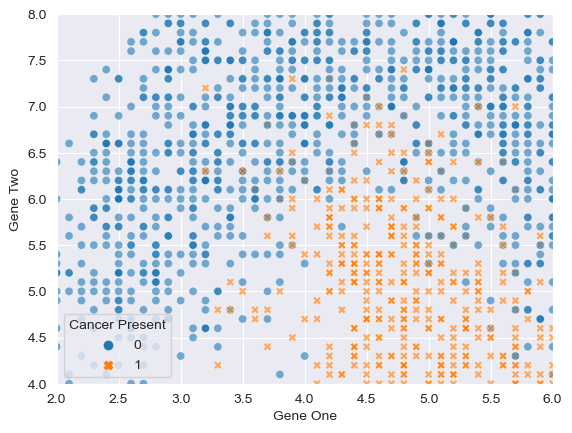

In [52]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df, hue="Cancer Present", alpha=0.6,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


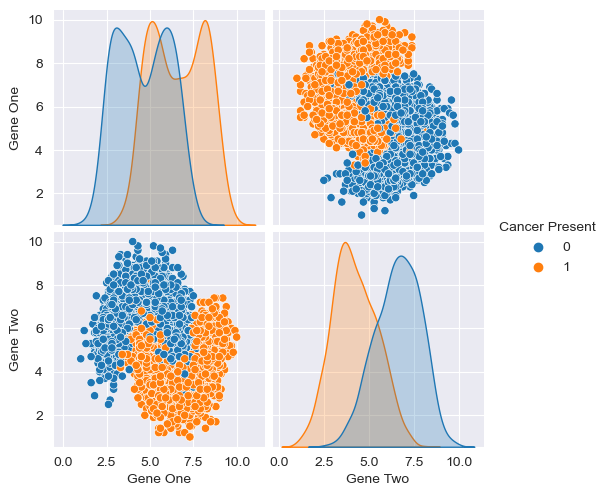

In [53]:
sns.pairplot(data=df, hue="Cancer Present")

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop(columns=['Cancer Present'])

In [57]:
y = df['Cancer Present']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [59]:
scaler = StandardScaler()

In [60]:
scaled_X_train = scaler.fit_transform(X_train)

In [61]:
scaled_X_test = scaler.transform(X_test)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [65]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
y_pred = knn_model.predict(scaled_X_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [69]:
confusion_matrix

array([[424,  46],
       [ 49, 381]])

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       470
           1       0.89      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


In [71]:
from sklearn.metrics import accuracy_score

In [73]:
test_error_rate = []
    
for k in range(1,30):
   knn_model = KNeighborsClassifier(n_neighbors=k)
   knn_model.fit(scaled_X_train, y_train)
   
   y_pred_test = knn_model.predict(scaled_X_test)
   test_error = 1-accuracy_score(y_test,y_pred_test)
   test_error_rate.append(test_error)
   

In [74]:
test_error_rate

[0.10555555555555551,
 0.09999999999999998,
 0.07444444444444442,
 0.07777777777777772,
 0.07222222222222219,
 0.06666666666666665,
 0.06333333333333335,
 0.05888888888888888,
 0.05777777777777782,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.061111111111111116,
 0.061111111111111116,
 0.06000000000000005,
 0.05777777777777782,
 0.05555555555555558,
 0.05555555555555558,
 0.053333333333333344,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05777777777777782]

Text(0, 0.5, 'Error Rate')

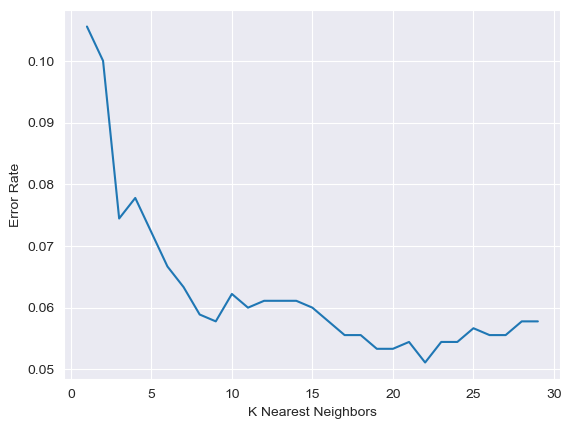

In [75]:
plt.plot(range(1,30),test_error_rate)
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Error Rate')

In [76]:
# Pipeline --> GRIDSEARCH CV  

In [77]:
scaler = StandardScaler()

In [78]:
knn = KNeighborsClassifier()

In [79]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [80]:
operations = [('scaler', scaler), ('knn',knn)]

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipe = Pipeline(operations)

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
k_values = list(range(1,20))

In [85]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [86]:
param_grid = {'knn__n_neighbors': k_values}

In [87]:
full_cv_classifier = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [89]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [90]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [92]:
full_pred = full_cv_classifier.predict(X_test)

In [93]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


In [94]:
new_patient = [[3.8,6.4]]

In [95]:
full_cv_classifier.predict(new_patient)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [96]:
full_cv_classifier.predict_proba(new_patient)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])